In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [148]:
df=pd.read_csv("customer_churn_data.csv")

In [149]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [151]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [152]:
df.isna().sum().sum()

297

In [153]:
df["InternetService"]=df["InternetService"].fillna("")

In [154]:
df.duplicated().sum()

0

In [155]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [156]:
numeric_columns_data=df.select_dtypes(include=[np.number])

In [157]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [158]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,,4465.56,No,Yes


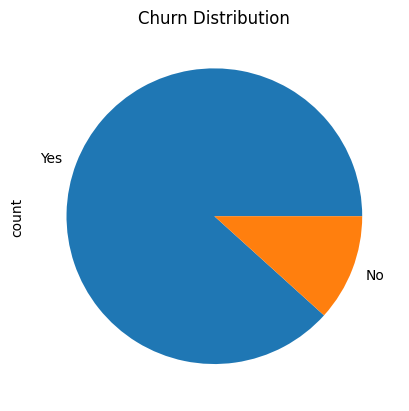

In [159]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn Distribution")
plt.show()

In [160]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [161]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [162]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [163]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

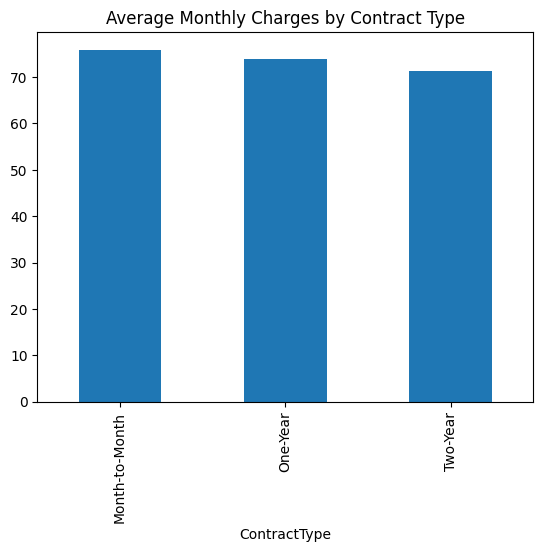

In [164]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.title("Average Monthly Charges by Contract Type")
plt.show()


In [165]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [166]:
#feature engineering
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [167]:
y=df[["Churn"]]
x=df[["Age","Gender","Tenure","MonthlyCharges"]]

In [168]:
x  #1 female ,0 male

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [169]:
# Reset x and y from raw df
x = df[["Age", "Gender", "Tenure", "MonthlyCharges"]].copy()
y = df[["Churn"]].copy()

# Confirm before encoding
print("Before encoding:")
print(x["Gender"].value_counts())
print(y["Churn"].value_counts())

# Encode Gender and Churn properly
x["Gender"] = x["Gender"].apply(lambda val: 1 if val == "Female" else 0)
y["Churn"] = y["Churn"].apply(lambda val: 1 if val == "Yes" else 0)

# Confirm after encoding
print("\nAfter encoding:")
print(x["Gender"].value_counts())
print(y["Churn"].value_counts())


Before encoding:
Gender
Female    538
Male      462
Name: count, dtype: int64
Churn
Yes    883
No     117
Name: count, dtype: int64

After encoding:
Gender
1    538
0    462
Name: count, dtype: int64
Churn
1    883
0    117
Name: count, dtype: int64


In [170]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [171]:
from sklearn.preprocessing import StandardScaler


In [172]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [173]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [174]:
x_test=scaler.fit_transform(x_test)

In [175]:
from sklearn.metrics import  accuracy_score
def modelperformance(predictions):
    accuracy=accuracy_score(y_test,predictions)
    print("Accuracy: ",accuracy*100)

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
log_model=LogisticRegression()

In [179]:
log_model.fit(x_train,y_train)

c:\Users\srini\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [180]:
y_pred=log_model.predict(x_test)

In [182]:
modelperformance(y_pred)

Accuracy:  88.5


In [190]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the model
knn = KNeighborsClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

y_pred=gridkn.predict(x_test)

In [191]:
modelperformance(y_pred)

Accuracy:  86.0


In [207]:
from sklearn.svm import SVC

In [208]:
svm=SVC()

In [209]:
param_grid = {
    "C" : [0.01, 0.1, 0.5,1],
    "kernel" : ["linear","rbf","poly"],
}

In [210]:
gridsvm=GridSearchCV(svm,param_grid,cv=5)

In [217]:
gridsvm.fit(x_train, y_train.values.ravel())  # Flatten y to avoid warnings


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [218]:
print("Best parameters:", gridsvm.best_params_)


Best parameters: {'C': 0.01, 'kernel': 'linear'}


In [219]:
y_pred=gridsvm.predict(x_test)

In [220]:
modelperformance(y_pred)

Accuracy:  88.5


In [222]:
from sklearn.tree import DecisionTreeClassifier

In [224]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None,10,20,30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [225]:
grid_tree=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

In [226]:
grid_tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [227]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'random'}

In [228]:
y_pred=gridsvm.predict(x_test)

In [229]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [230]:
modelperformance(y_pred)

Accuracy:  88.5


In [231]:
from sklearn.ensemble import RandomForestClassifier

In [232]:
rfc=RandomForestClassifier()

In [233]:
param_grid = {
    "n_estimators": [32, 50, 150],
    "max_features":[2,3,4],
    "bootstrap":[True,False]
}

In [234]:
grid_rfc=GridSearchCV(rfc,param_grid,cv=5)

In [235]:
grid_rfc.fit(x_train,y_train)

c:\Users\srini\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\srini\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\srini\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\srini\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConvers

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 50, 150]})

In [236]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 150}

In [237]:
y_pred=gridsvm.predict(x_test)
modelperformance(y_pred)

Accuracy:  88.5


In [240]:
gridsvm.best_estimator_

SVC(C=0.01, kernel='linear')

In [241]:
best_model=gridsvm.best_estimator_

In [242]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [243]:
x.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')